In [19]:
# Product Segmentation and Sales Forecasting Task
import pandas as pd

file_path = 'Grinta -DataScientist- Case Study.xlsx'
df = pd.read_excel(file_path, sheet_name=None)

data = df['Grinta -DataScientist- Case Stu']

data_clean = data.dropna(subset=['Description', 'CustomerID'])
data_clean['Month'] = data_clean['InvoiceDate'].dt.to_period('M')

product_sales = data_clean.groupby(['StockCode', 'Month'])['Quantity'].sum().reset_index()

product_sales_pivot = product_sales.pivot(index='StockCode', columns='Month', values='Quantity').fillna(0)


<ipython-input-19-007c218e6e5c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Month'] = data_clean['InvoiceDate'].dt.to_period('M')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

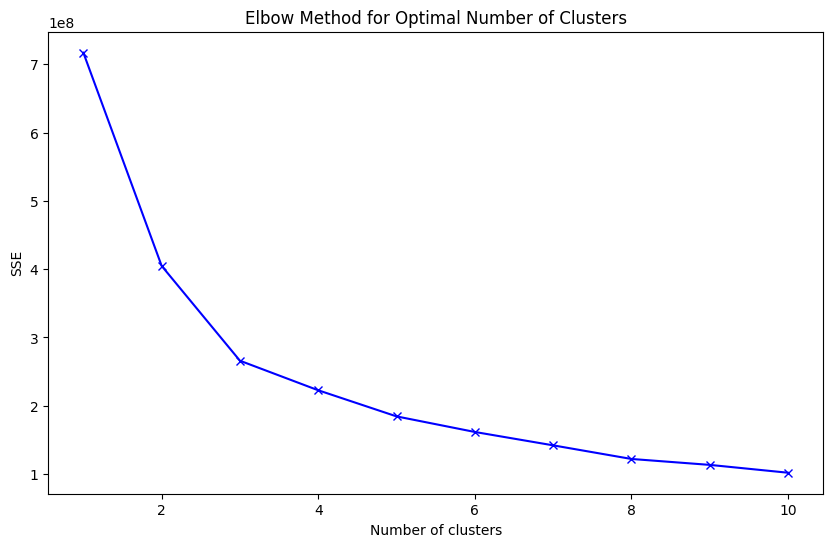

In [20]:
# Perform Clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sampled_data = product_sales_pivot.sample(frac=0.1, random_state=42)

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(sampled_data)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [21]:
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, max_iter=1000)
product_clusters = kmeans.fit_predict(product_sales_pivot)

product_sales_pivot['Cluster'] = product_clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
# Identify Top Contributors and Slow-moving Products

total_sales = data_clean.groupby('StockCode')['Quantity'].sum().reset_index()
total_sales.columns = ['StockCode', 'TotalQuantity']

clustered_data = product_sales_pivot.reset_index().merge(total_sales, on='StockCode', how='left')

product_descriptions = data_clean[['StockCode', 'Description']].drop_duplicates()
clustered_data = clustered_data.merge(product_descriptions, on='StockCode', how='left')

top_contributors = clustered_data.nlargest(10, 'TotalQuantity')

slow_moving_products = clustered_data.nsmallest(10, 'TotalQuantity')

print("Top Contributors:\n", top_contributors)
print("\nSlow-moving Products:\n", slow_moving_products)


Top Contributors:
      StockCode  2010-12  2011-01  2011-02  2011-03  2011-04  2011-05  2011-06  \
2712     84077   5139.0   1488.0   3457.0   3888.0  10128.0   3888.0   1920.0   
1039     22197   2103.0   1682.0   2502.0   2029.0   1788.0   6737.0   1986.0   
1040     22197   2103.0   1682.0   2502.0   2029.0   1788.0   6737.0   1986.0   
3586    85099B   2030.0   2517.0   2969.0   4923.0   2207.0   3466.0   3523.0   
2818     84879   2267.0   1715.0   1619.0   2497.0   2368.0   3035.0   1516.0   
3592    85123A   3083.0   5456.0   1820.0   1901.0   1789.0   3831.0   1599.0   
3593    85123A   3083.0   5456.0   1820.0   1901.0   1789.0   3831.0   1599.0   
361      21212   3542.0   3327.0   1912.0   3720.0   2768.0   3212.0   1778.0   
1937     23084      0.0      0.0      0.0      0.0      0.0   1097.0   1601.0   
1314     22492   2700.0   1907.0    829.0   2736.0   1548.0   1836.0   1407.0   

      2011-07  2011-08  2011-09  2011-10  2011-11  2011-12  Cluster  \
2712   3552.0   22

In [23]:
# Identify Top Contributors and Slow-moving Products

cluster_counts = clustered_data['Cluster'].value_counts()

common_products = {}
for cluster in clustered_data['Cluster'].unique():
    common_products[cluster] = clustered_data[clustered_data['Cluster'] == cluster][['StockCode', 'Description']].to_dict('records')

print("Common Products in Each Cluster:\n", common_products)


Common Products in Each Cluster:
 {1: [{'StockCode': 10002, 'Description': 'INFLATABLE POLITICAL GLOBE '}, {'StockCode': 10080, 'Description': 'GROOVY CACTUS INFLATABLE'}, {'StockCode': 10120, 'Description': 'DOGGY RUBBER'}, {'StockCode': 10125, 'Description': 'MINI FUNKY DESIGN TAPES'}, {'StockCode': 10133, 'Description': 'COLOURING PENCILS BROWN TUBE'}, {'StockCode': 10135, 'Description': 'COLOURING PENCILS BROWN TUBE'}, {'StockCode': 11001, 'Description': 'ASSTD DESIGN RACING CAR PEN'}, {'StockCode': 15030, 'Description': 'FAN BLACK FRAME '}, {'StockCode': 15039, 'Description': 'SANDALWOOD FAN'}, {'StockCode': 16008, 'Description': 'SMALL FOLDING SCISSOR(POINTED EDGE)'}, {'StockCode': 16010, 'Description': 'FOLDING CAMPING SCISSOR W/KNIF & S'}, {'StockCode': 16011, 'Description': 'ANIMAL STICKERS'}, {'StockCode': 16012, 'Description': 'FOOD/DRINK SPONGE STICKERS'}, {'StockCode': 16015, 'Description': 'MEDIUM CHINESE STYLE SCISSOR'}, {'StockCode': 16016, 'Description': 'LARGE CHINESE

In [24]:
# Sales Forecasting

from sklearn.model_selection import train_test_split

monthly_sales = data_clean.groupby('Month')['Quantity'].sum().reset_index()

monthly_sales['Month'] = monthly_sales['Month'].astype(str).apply(lambda x: x + '-01')
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])

monthly_sales.set_index('Month', inplace=True)

X = (monthly_sales.index - monthly_sales.index.min()).days.values.reshape(-1, 1)
y = monthly_sales['Quantity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


Training R^2 score: 0.6743259163832112
Testing R^2 score: -0.1430108899636291


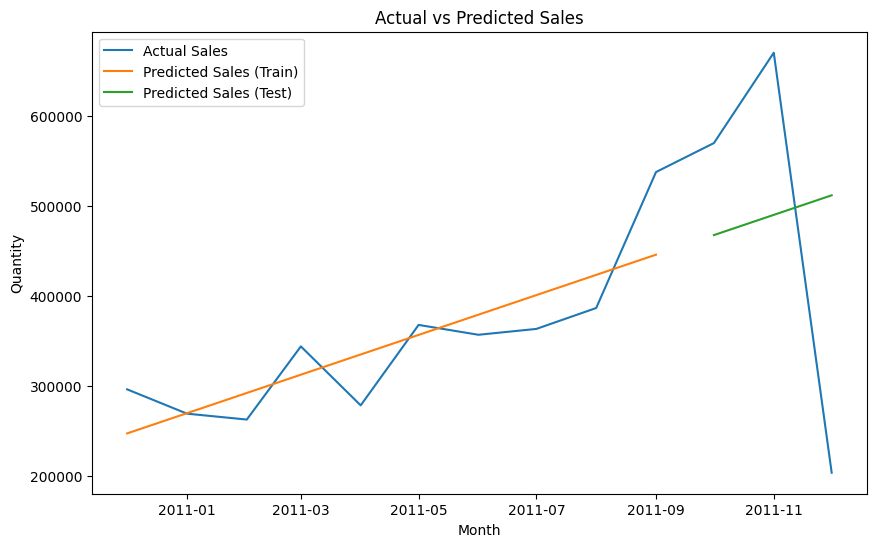

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training R^2 score: {train_score}")
print(f"Testing R^2 score: {test_score}")

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, y, label='Actual Sales')
plt.plot(monthly_sales.index[:len(y_train)], y_pred_train, label='Predicted Sales (Train)')
plt.plot(monthly_sales.index[len(y_train):], y_pred_test, label='Predicted Sales (Test)')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


In [26]:
# Cross-Selling

def recommend_products(stock_code, clustered_data):
    cluster = clustered_data.loc[clustered_data['StockCode'] == stock_code, 'Cluster'].values[0]

    similar_products = clustered_data[clustered_data['Cluster'] == cluster][['StockCode', 'Description']].to_dict('records')

    similar_products = [product for product in similar_products if product['StockCode'] != stock_code]

    return similar_products

recommended_products = recommend_products(22467, clustered_data)
print("Recommended Products for 22467:\n", recommended_products)


Recommended Products for 22467:
 [{'StockCode': 15034, 'Description': 'PAPER POCKET TRAVELING FAN '}, {'StockCode': 16014, 'Description': 'SMALL CHINESE STYLE SCISSOR'}, {'StockCode': 16045, 'Description': 'POPART WOODEN PENCILS ASST'}, {'StockCode': 16218, 'Description': 'CARTOON  PENCIL SHARPENERS'}, {'StockCode': 16237, 'Description': 'SLEEPING CAT ERASERS'}, {'StockCode': 18007, 'Description': 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE'}, {'StockCode': 20668, 'Description': 'DISCO BALL CHRISTMAS DECORATION'}, {'StockCode': 20712, 'Description': 'JUMBO BAG WOODLAND ANIMALS'}, {'StockCode': 20713, 'Description': 'JUMBO BAG OWLS'}, {'StockCode': 20719, 'Description': 'WOODLAND CHARLOTTE BAG'}, {'StockCode': 20723, 'Description': 'STRAWBERRY CHARLOTTE BAG'}, {'StockCode': 20724, 'Description': 'RED RETROSPOT CHARLOTTE BAG'}, {'StockCode': 20725, 'Description': 'LUNCH BAG RED RETROSPOT'}, {'StockCode': 20725, 'Description': 'LUNCH BAG RED SPOTTY'}, {'StockCode': 20726, 'Description': 'LUNCH B